### CNN Performance
- CNN 모델을 제작할 때, 다양한 기법을 통해 성능 개선 및 과적합 개선이 가능하다.  
<sub>*모델을 생성하기 전이 전처리 과정이며,  
해당 부분은 모델 생성 시 진행되는 과정으로 퍼포먼스라고 칭한다(전처리라고 보기에 무리가 있음).</sub>

#### Weight Initialization, 가중치 초기화
- 처음 가중치를 어떻게 줄 것인지를 정하는 방법이며, 처음 가중치를 어떻게 설정하느냐에 따라 모델의 성능이 크게 달라질 수 있다.  
<sub>*가중치를 최초 한번만 초기화 하다보니 점점 층을 타면서 흐트러지는 문제가 발생한다.  
활성화 함수를 타고 갈 때 결과 값으로 가중치가 결정이 되고 filter로 output의 개수가 나오며 가중치가 흐트러진다.  
히를 하면 매번 초기화를 해주기 때문에 분포가 맞아간다.  
따라서, 중간에 히를 사용하고 마지막 출력에서 글로로트를 사용해야 한다.</sub>
  
> 1. 사비에르 글로로트 초기화
> - 고정된 표준편차를 사용하지 않고, 이전 층의 노드 수에 맞게 현재 층의 가중치를 초기화한다.
> - 층마다 노드 개수를 다르게 설정하더라도 이에 맞게 가중치가 초기화되기 때문에 고정된 표준편차를 사용하는 것보다 이상치에 민감하지 않다.
> - 활성화 함수가 ReLU일 때, 층이 지날 수록 활성화 값이 고르지 못하게 되는 문제가 생겨서, 출력층에서만 사용한다.
>  
> <div style="display: flex; margin-left: 50px;">
    <div>
        <img src="./images/xavier01.png">
    </div>
    <div>
        <img src="./images/xavier02.png" style="margin-left: 50px;">
    </div>
</div>  

> 2. 카이밍 히 초기화
> - 고정된 표준편차를 사용하지 않고, 이전 층의 노드 수에 맞게 현재 층의 가중치를 초기화한다.
> - 층마다 노드 개수를 다르게 설정하더라도 이에 맞게 가중치가 초기화되기 때문에 고정된 표준편차를 사용하는 것보다 이상치에 민감하지 않다.
> - 활성화 함수가 ReLU일 때, 추천하는 초기화 방법으로서, 층이 깊어지더라도 모든 활성값이 고르게 분포된다.
> <img src="./images/he.png" style="margin-left: 50px;">

#### Batch Normalization, 배치 정규화
- 입력 데이터 간에 값의 차이가 발생하면, 가중치의 비중도 달라지기 때문에 층을 통과할 수록 편차가 심해진다.  
   이를 내부 공변량 이동(Internal Convariant Shift)이라고 한다.
- 가중치의 값의 비중이 달라지면, 특정 가중치에 중점을 두면서 경사 하강법이 진행되기 때문에,  
  모든 입력값을 표준 정규화하여 최적의 parameter를 보다 빠르게 학습할 수 있도록 해야한다.
- 가중치를 초기화할 때 민감도를 감소시키고, 학습 속도 증가시키며, 모델을 일반화하기 위해서 사용한다.

<div style="display: flex; width: 90%;">
    <div>
        <img src="./images/BN01.png" width="900" style="margin-top: 20px;">
    </div>
    <div>
        <img src="./images/BN02.png" width="900">
    </div>
</div>

- BN은 activation function 앞에 적용하면, weight 값은 평균이 0, 분산이 1인 상태로 정규분포가 된다.
- ReLU가 activation으로 적용되면 음수에 해당하는(절반 정도) 부분이 0이 된다.  
  이러한 문제를 해결하기 위해서 γ(감마)와 β(베타)를 사용해서 음수부분이 모두 0이 되는 것을 막아준다.

<div style="display: flex; width: 70%;">
    <div>
        <img src="./images/BN03.png" width="1000" style="margin-top: 20px;">
    </div>
    <div>
        <img src="./images/BN04.png" width="800">
    </div>
</div>

#### Batch Size
- batch size를 작게 하면, 적절한 noise가 생겨서 overfitting을 방지하게 되고, 모델의 성능을 향상시키는 계기가 될 수 있지만, 너무 작아서는 안된다.
- batch size를 너무 작게 하는 경우에는 batch당 sample 수가 작아져서 훈련 데이터를 학습하는 데에 부족할 수 있다.
- 따라서 굉장히 크게 주는 것 보다는 작게 주는 것이 좋으며, 이를 또 너무 작게 주어서는 안된다.  
  **논문에 따르면 8보다 크고 32보다 작게 주는 것이 효과적이라고 한다(상황에 따라 다름).**

<div style="display: flex; width: 70%;">
    <div>
        <img src="./images/batch_size01.png" width="800" style="margin-top: 10px;">
    </div>
    <div>
        <img src="./images/batch_size02.png" width="800">
    </div>
</div>


#### Global Average Pooling
- 이전의 Pooling들은 면적을 줄이기 위해 사용했지만, Global Average Pooling은 면적을 없애고 채널 수 만큼 값을 나오게 한다.
- feature map의 가로 X 세로의 특정 영역을 Sub smapling하지 않고, 채널 별로 평균 값을 추출한다.
- feature map의 채널 수가 많을 경우(보통 512개 이상) 이를 적용하고, 채널 수가 적다면 Flatten을 적용한다.
- Flatten 후에 Classification Dense Layer로 이어지면서 많은 파라미터들로 인한 overfitting 유발 가능성 증대 및 학습 시간 증가로 이어지기 때문에  
  맨 마지막 feature map의 채널 수가 크다면 Global Average Pooling을 적용하는 것이 더 나을 수 있다.

<img src="./images/global_average_pooling.png" width="650px">

#### Weight Regularization (가중치 규제), Weight Decay (가중치 감소)
- loss function은 loss 값이 작아지는 방향으로 가중치를 update한다.
- 하지만, loss를 줄이는 데에만 신경쓰게 되면, 특정 가중치가 너무 커지면서 오히려 나쁜 결과를 가져올 수 있다.
- 기존 가중치에 특정 연산을 수행하여 loss function의 출력 값과 더해주면 loss function의 결과를 어느정도 제어할 수 있게 된다.
- 보통 파라미터가 많은 Dense Layer에서 많이 사용되고 가중치 규제보다는 loss function에 규제를 걸어 가중치를 감소시키는 원리이다.
- kernel_regularizer 파라미터에서 l1, l2을 선택할 수 있다.  
<sub>*규제된 손실 함수는 목적 함수에 규제를 적용하기 때문에 "목적 함수 규제"라고 할 수 있다.   
특정 가중치가 증가하는 방향으로 최소값을 찾아 나갈 수 있다(큰 오류).  
손실 함수를 업데이트하면 손실을 최소화하려고 하지만, 이는 손실을 줄이는 방향으로 이루어지기 때문에 가중치를 조절하는 데 있어서 주의를 기울일 필요가 있다.
* 가중치를 감소한다는 것은 모델을 일반화하는 것이다.</sub>

<img src="./images/regularization.png" width="450px">

In [1]:
from tensorflow.keras.datasets import cifar10

# tensorflow 라이브러리에 내장되어 있는 데이터 세트 호출 후 데이터 세트 분리
(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

# 데이터 형태 확인
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [2]:
# 차원이 1인 축을 제거하여 타겟 배열을 평평하게 만듦
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

# 데이터 형태 확인
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [3]:
import numpy as np

# 전처리 함수 선언
def get_preprocessed_data(images, targets):
    # 픽셀 범위를 0 또는 1로 이미지 정규화 후 형변환
    images = np.array(images / 255.0, dtype=np.float32)
    # 타겟 데이터 형변환
    targets = np.array(targets, dtype=np.float32)

    return images, targets

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# 입력 데이터 크기 지정
INPUT_SIZE = 32

# Input layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Convolutional Layer 1
# alpha를 크게 할 수록 Weight값을 작게 만들어서 과적합을 개선할 수 있고
# alpha를 작게 할 수록 Weight의 값이 커지지만, 어느 정도 상쇄하므로 과소적합을 개선할 수 있다.
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 2
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 3
x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# 각 채널의 모든 값의 평균을 계산하여 하나의 값으로 축소
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
# Dense Layer (은닉층)
x = Dense(300, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
# Dense Layer (출력층)
output = Dense(10, activation='softmax', kernel_initializer='glorot_normal')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,0

 Total params: 1,229,102 (4.69 MB)

 Trainable params: 1,227,310 (4.68 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

# 훈련
history = model.fit(x=train_images, y=train_targets, validation_split=0.2, batch_size=32, epochs=3, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 206s 162ms/step - acc: 0.3186 - loss: 1.9519 - val_acc: 0.4452 - val_loss: 1.5700 - learning_rate: 0.0010
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 211s 169ms/step - acc: 0.5908 - loss: 1.1738 - val_acc: 0.5333 - val_loss: 1.3446 - learning_rate: 0.0010
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 237s 189ms/step - acc: 0.6696 - loss: 0.9750 - val_acc: 0.7060 - val_loss: 0.8687 - learning_rate: 0.0010


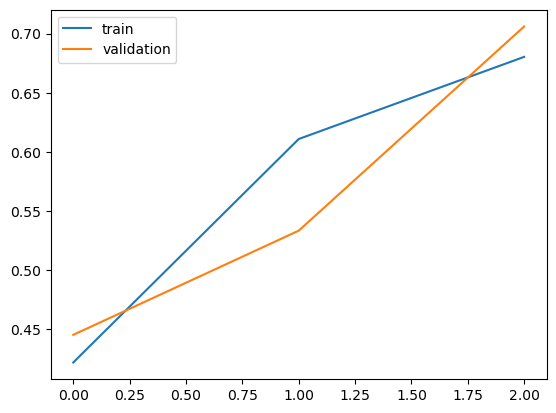

In [7]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [8]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - acc: 0.7037 - loss: 0.8719


[0.8827947378158569, 0.6985999941825867]

#### TIP!
규제는 1~2Cycle 돌려보고 격차가 많이 차이 나면 사용할 것!